# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd



# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [3]:
# Your code here:

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [6]:
# Your code here:
pokemon.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [16]:
# Your code here:
print(f'mean {pokemon.Total.mean()}')
print(f'SD {pokemon.Total.std()}')

legendaries, plebs = pokemon[pokemon.Legendary == True], pokemon[pokemon.Legendary == False]

print('legends: mean', legendaries.Total.mean(), 'SD', legendaries.Total.std())
print('plebs: mean', plebs.Total.mean(), 'SD', plebs.Total.std())


mean 435.1025
SD 119.96303975551899
legends: mean 637.3846153846154 SD 60.93738905315344
plebs: mean 417.21360544217686 SD 106.76041745713005


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [19]:
# Your code here:
import scipy.stats 

scipy.stats.ttest_ind(legendaries.Total, plebs.Total, equal_var=False)


Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957446e-47)

What do you conclude from this test? Write your conclusions below.

In [6]:
# Your conclusions here:
# Significantly different, since we have a low p - value (p << 0.05)


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [21]:
# Your code here:
pokemon['Type 1'].value_counts()


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [29]:
water = pokemon[pokemon['Type 1'] == 'Water']
others = pokemon[pokemon['Type 1'] != 'Water']

waterMean = water.Total.mean()
waterSD = water.Total.std()
othersMean = others.Total.mean()
othersSD = others.Total.std()

print('water mean and SD', waterMean, waterSD)
print('others mean and SD', othersMean, othersSD)

water mean and SD 430.45535714285717 113.1882660643146
others mean and SD 435.85901162790697 121.0916823020807


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [30]:
scipy.stats.ttest_ind(water.Total, others.Total, equal_var=False)

Ttest_indResult(statistic=-0.4638681676327303, pvalue=0.6433915385821449)

Write your conclusion below.

In [10]:
# Your conclusions here:
# Water pokemon do not have a significantly different amount of total stats (p is not < 0.05)


# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)


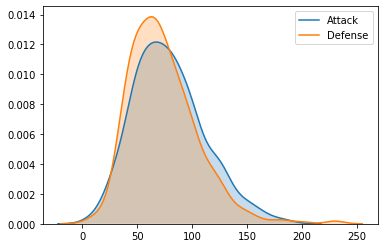

In [35]:
from scipy.stats import ttest_rel
import seaborn as sns

print(ttest_rel(pokemon.Attack, pokemon.Defense))

sns.kdeplot(pokemon.Attack,shade=True)
sns.kdeplot(pokemon.Defense,shade=True)


Describe the results of the test in the cell below.

In [12]:
# Your conclusions here:
# Attacks seems to be significantly different from defence, from the low p value (<<0.05)


We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [36]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)


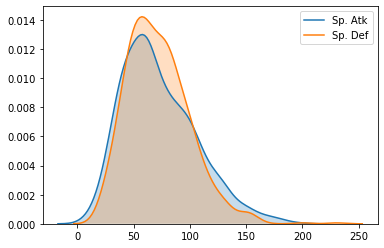

In [39]:
a = pokemon['Sp. Atk']
b = pokemon['Sp. Def']

print(ttest_rel(a,b))

sns.kdeplot(pokemon['Sp. Atk'],shade=True)
sns.kdeplot(pokemon['Sp. Def'],shade=True)



Describe the results of the test in the cell below.

In [14]:
# Your conclusions here:
# No significant difference since p is not < 0.05


As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

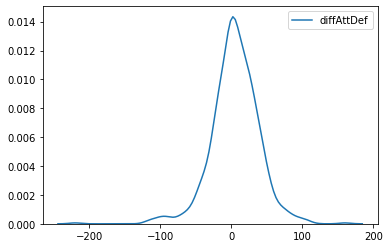

In [42]:
pokemon['diffAttDef'] = pokemon.Attack - pokemon.Defense
sns.kdeplot(pokemon.diffAttDef)
    

In [43]:
from scipy.stats import ttest_1samp

# Same p-value, so same test - YAY!
ttest_1samp(pokemon.diffAttDef, 0)

Ttest_1sampResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [63]:
# Your code here:
# for type in pokemon[pokemon['Type 1'] != 'Water']['Type 1']:
#     type = 'Other'
types  = pd.crosstab(pokemon['Type 1'] == 'Water', pokemon.Legendary)
types

Legendary,False,True
Type 1,,
False,627,61
True,108,4


In [64]:
# who are the water legendaries?

pokemon[(pokemon['Type 1'] == 'Water') & pokemon.Legendary]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,diffAttDef
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True,-40
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True,10
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,60
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True,20


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [69]:
from scipy.stats import chi2_contingency as ch2

ch2(types)[:2]

(2.9429200762850503, 0.08625467249550949)

Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:

